In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def myMAD(x):
    med = np.median(x)
    x   = abs(x-med)
    MAD = np.median(x)
    return MAD

In [3]:
df1 = pd.read_csv('Android/results/performances_nexus5.csv')
df1['smartphone'] = 'nexus5'
df2 = pd.read_csv('Android/results/performances_nexus6.csv')
df2['smartphone'] = 'nexus6'
df3 = pd.read_csv('Android/results/performances_s9.csv')
df3['smartphone'] = 'S9 plus'
df4 = pd.read_csv('Android/results/performances_xiaomi.csv')
df4['smartphone'] = 'Mi9T'

df = pd.concat([df1, df2, df3, df4])
df.pop('warmup')

0     36.1023
1     35.6087
2     36.5127
3     37.2153
4     37.2647
       ...   
25    19.6248
26    19.8854
27    19.7889
28    19.9342
29    19.7814
Name: warmup, Length: 118, dtype: float64

In [4]:
means = df.groupby([df.smartphone, df.model]).median().unstack()
errors = df.groupby([df.smartphone, df.model]).mad().unstack()

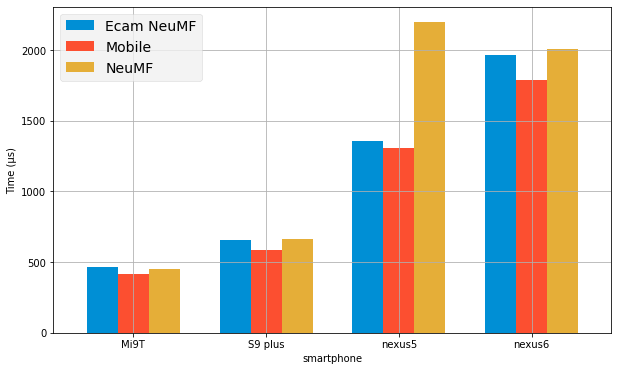

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
plt.style.use("fivethirtyeight")

plot = means['init'].plot(kind= 'bar', 
                     rot=0,  # don't rotate model names
                     ylabel='Time (μs)',
                     #yerr=errors['init'], # standard deviation
                     capsize=6, # std cap size
                     width=0.7,
                     ax=ax,
                     grid=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Ecam NeuMF', 'Mobile', 'NeuMF']) # rename legend